# MONGODB

### No SQL vs SQL

- No SQL == Non SQL == Non Relational == No Table Format
- No Sql == Key Value pair DB

### Type of No SQL DB's
- MongoDB
- Amazon DocumentDB
- Google Datastore
- Amazon DynamoDB

- Powerful, High Performance, Large big data apps, Large distributed network architecture apps

### MONGODB

- Free 
- Open Source
- Cross Platform
- Document Oriented DB
- No SQL Database Program
- JSON like docs with schemas


### Document Oriented DB

- Provides APIs
- Query/Update Laguage

{
	field1 = value1,
	field2 = value2
}


### What MongoDb is NOT

- Not RDBMS system
- No concept of Joins
- Not tough / complicated


### Languages support MongoDB

- PHP
- Node JS
- Python
- Java
- C#
- C++

### MONGODB INSTALLATION

### Ways to Install

- Community Server
	- On System

- VSC
	- MongoDb for VS Code

- MongoDB Atlas
	- Cloud Hosted


### Community Server
- MongoDB Server
	- Install MongoDb Server
	- sudo dpkg -i mongodb-server-*

- MongoDB Shell
	- Install MongoDb Shell
	- sudo dpkg -i mongodb-shell-*

- MongoDB Compass
	- Install MongoDb Compass
	- sudo dpkg -i mongodb-compass-*

- usr/bin/mongod

##### Method 1: Official MongoDB Package (Recommended)
- Import the MongoDB Public GPG Key
    - `wget -qO - https://www.mongodb.org/static/pgp/server-6.0.asc` | `sudo apt-key add -`

- Create a List File for MongoDB
    - `echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu $(lsb_release -cs)/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list`

- Update the Local Package Database
    - `sudo apt update`

- Install MongoDB Packages
    - `sudo apt install -y mongodb-org`

- Start MongoDB Service
    - `sudo systemctl start mongod`

- Enable MongoDB to Start on Boot
    - `sudo systemctl enable mongod`

- Verify Installation
    - `mongo --version`
    - `sudo systemctl status mongod`

##### Method 2: Using Snap (Simpler but may not be latest version)

- `sudo snap install mongodb-community --classic`
- `sudo snap start mongodb-community`

### Post-Installation Setup


### 1. Secure MongoDB (Recommended for production)

    mongo
    > use admin
    > db.createUser({
      user: "admin",
      pwd: passwordPrompt(),  // Will prompt for password
      roles: [ { role: "userAdminAnyDatabase", db: "admin" } ]
    })
    > exit



### 2. Enable Authentication (Edit config file)

`sudo nano /etc/mongod.conf`

- Add/modify:
	security:
		authorization: enabled

- Then restart:
	sudo systemctl restart mongod

### Uninstall MongoDB:

- `sudo apt purge mongodb-org*`
- `sudo rm -r /var/log/mongodb`
- `sudo rm -r /var/lib/mongodb`

### Common Commands

- Start service: `sudo systemctl start mongod`

- Stop service: `sudo systemctl stop mongod`

- Restart service: `sudo systemctl restart mongod`

- Check status: `sudo systemctl status mongod`

### Troubleshooting

- If you get connection errors:

    Check if service is running: `sudo systemctl status mongod`

    Check logs: `sudo journalctl -u mongod -f`

    Verify port 27017 is open: `sudo netstat -tulnp | grep 27017`

# MongoDB INTRO

- DATABASE
	- Collection of data, Collection of collections

- COLLECTIONS
	- Group of documents
	- No relations like tables
	- No Schema definition for Collections
		- Dynamic Schema - can have same or different
	- No Joins, but aggregations do same

- DOCUMENTS
	- key : value - pairs
		- { name: 'ashoka', age: 22}
	- Flexible & Dynamic Schema
	- User Defined Shema - Not fixed or static
	- Can hold any data within mongodb valid datatypes
	- Adds Automatic key _id
	- Documents within collection are related

## CREATE DB

- `use dtatabase_name`
	- select / create
	- created but not visible
	- switched to db db-name

## REMOVE DB

- db.dropDatabase()
	- current switched DB

### CREATE COLLECTIONS

- Creates Collection

	- `db.createCollection(name, options)`


- Creates collection and inserts

	- `db.posts.insertOne(object)` 


### DROP COLLECTIONS

- db.collecton.drop()

### Datatypes in MongoDB

- Integer
- Double
- Boolean
- Arrays
- Object
- Null

- Date
- Timestamp

- Object Id
- Code

- JSON
	- { name: 'ashoka', age: 12}
	- Easy to parse, Easy to render

- BSON
	- Binary Encoded JSON = BSON
	- Extended datatypes
		- date
		- timestamp
		- Object Id
		


### INSERTING DOCUMENTS INTO COLLECTIONS

- Insert One Document - insert()

	- `db.collection_name.insert( {key: value} )`
	- `db.collection_name.insertOne( {key: value} )`  // Explicitly for single docs


- Insert Many Documents - insertMany()

	- `db.collection_name.insertMany( [ {data}, {data}, {data} ] )`

	- Ordered vs Unordered Inserts (Critical for error handling):
	- `db.collection_name.insertMany( [...], { ordered: false })`  // Continues on errors


##### What Happens During Insert

- Document Creation
	- MongoDB stores documents in BSON (Binary JSON) format.
	- Field order is preserved (unlike standard JSON).

- Automatic _id Generation
	- Structure: _id: ObjectId("507f1f77bcf86cd799439011")
	- 12-byte hex string:
		| Timestamp (4 bytes) | Machine ID (3) | Process ID (2) | Counter (3) |
	- Custom _id: You can provide your own (e.g., UUIDs, integers), but:

	- `db.users.insert({ _id: "user123", name: "Eve" })`  // Allowed but risky!


### UPDATING DOCUMENTS INTO COLLECTIONS

- Update One - updateOne( {search condition}, { $set:{ key: value } },  { upsert: true })

	- `db.collection_name.update( {key: value, ...}, { $set:{ key: value } } )` // deprecated
	- `db.collection_name.updateOne( {key: value, ...}, { $set:{ key: value } } )`


- Update Many - updateMany()

	- `db.collection_name.updateMany( {'isActive': true}, { $set: {'isActive': false} } )`
	- `db.collection_name.updateMany( {}, { $set:{ key: value } } )` // updates all documents


 - another way to bulkwrite ?
 - why no [] for updateMany - Needs atomic values

### FIND DOCUMENTS IN COLLECTIONS

- Find All Docs - find( {filter}, {projection} )
	
	- `db.collection_name.find()`
	- `db.collection_name.find( {key:value, ...} )`
	- `db.collection_name.find( {}, {key: 1, ...} )`  // 1 = true, 0 = false

	- id will always include unless specifically exclude - _id = 0 
	- cannot use both 0 and 1 in the same object // exception for _id


- Find First One - findOne()

	- `db.collection_name.findOne()`
	- 


- Find and Modify - findAndModify()

	- `db.collection_name.findAndModify( { } )`
	- db.details.findAndModify({
		query: { age: 22 },              // 🔍 what to match
		update: { $set: { age: 20 } },   // 🛠️ what to change
		new: true                        // ✅ return updated doc (optional)
	});


- Find One and Replace - findOneAndReplace( {condition}, {replacement} )

	- `db.collection_name.findOneAndReplace( {key: value, ... }, {key: value, ... } )`


- Find One and Update - findOneAndUpdate()

	- `db.collection_name.findOneAndUpdate( {key: value, ... }, {key: value, ... } )`


- Find One and Delete - findOneAndDelete()

	- `db.collection_name.findOneAndDelete( {key: value, ... } )`


### DELETE DOCUMENTS FROM COLLECTIONS

- Delete Only One - deleteOne( {condition} )

	- `db.collection_name.deleteOne( {key: value, ...} )`


- Delete Many - deleteMany( {condition} )

	- `db.collection_name.deleteMany( {key: value, ...} )`


- Delete All - deleteMany( {} )

	- `db.collection_name.deleteMany( {} )`

## OPERATORS

- `Query and Projection Operators`
    - Query operators provide ways to locate data within the database
	- projection operators modify how data is presented.

- `Update Operators`
    - Update operators are operators that enable you to modify the data in your database or add additional data.

- `Aggregation Stages`
    - Available aggregation stages for Aggregation Pipeline.

- `Aggregation Operators`
    - Aggregation pipeline operations have a collection of operators available to define and manipulate documents in pipeline stages.


- ### Comparison

- `$eq`
	- Matches values that are equal to a specified value.
	- `{ field: { $eq: value } }`

- `$ne`
	- Matches all values that are not equal to a specified value.
	- `{ field: { $ne: value } }`

- `$gt`
	- Matches values that are greater than a specified value.
	- `{ field: { $gt: value } }`

- `$gte`
	- Matches values that are greater than or equal to a specified value.
	- `{ field: { $gte: value } }`

- `$lt`
	- Matches values that are less than a specified value.
	- `{ field: { $lt: value } }`

- `$lte`
	- Matches values that are less than or equal to a specified value.
	- `{ field: { $lte: value } }`

- `$in`
	- Matches any of the values specified in an array.
	- `{ field: { $in: [<value1>, <value2>, ... <valueN> ] } }`

- `$nin`
	- Matches none of the values specified in an array.
	- `{ field: { $nin: [ <value1>, <value2> ... <valueN> ] } }`

### Logical

- `$and`
	- Joins query clauses with a logical AND returns all documents that match the conditions of both clauses.
	- `{ $and: [ { <expression1> }, { <expression2> } , ... , { <expressionN> } ] }`
	- - `{ $and: [ { $or: [ { <expression1> }, ... ] }, { $or: [ { <expression1> }, ... ] } , ... , { $or: [ { <expression1> } ] } ] }`

- `$or`
	- Joins query clauses with a logical OR returns all documents that match the conditions of either clause.
	- `{ $or: [ { <expression1> }, { <expression2> }, ... , { <expressionN> } ] }`

- `$not`
	- Inverts the effect of a query predicate and returns documents that do not match the query predicate.
	- `{ field: { $not: { <operator-expression> } } }`
	
- `$nor`
	- Joins query clauses with a logical NOR returns all documents that fail to match both clauses.
	- `{ $nor: [ { <expression1> }, { <expression2> }, ...  { <expressionN> } ] }`



### Element 

- `$exists`
	- Matches documents that have the specified **field**.
	- `{ field: { $exists: <boolean> } }`
	- `db.inventory.find( { qty: { $exists: true, $nin: [ 5, 15 ] } } )`

- `$type`
	- Selects documents if a field is of the specified type.	
	- `{ field: { $type: <BSON type> } }`
	- `{ field: { $type: [ <BSON type1> , <BSON type2>, ... ] } }`

### Evaluation

- `$expr`
	- Allows use of aggregation expressions within the query language.

- `$jsonSchema`
	- Validate documents against the given JSON Schema.

- `$mod`
	- Performs a modulo operation on the value of a field and selects documents with a specified result.

- `$regex`
	- Selects documents where values match a specified regular expression.

- `$text`
	- Performs text search.

- `$where`
	- Matches documents that satisfy a JavaScript expression.

### Geospatial

- `$geoIntersects`
	- Selects geometries that intersect with a GeoJSON geometry. The 2dsphere index supports $geoIntersects.

- `$geoWithin`
	- Selects geometries within a bounding GeoJSON geometry. The 2dsphere and 2d indexes support $geoWithin.

- `$near`
	- Returns geospatial objects in proximity to a point. Requires a geospatial index. The 2dsphere and 2d indexes support $near.

- `$nearSphere`
	- Returns geospatial objects in proximity to a point on a sphere. Requires a geospatial index. The 2dsphere and 2d indexes support $nearSphere.

### Array

- `$all`
	- Matches **arrays** that contain all elements specified in the query.
	- `{ <field>: { $all: [ <value1> , <value2> ... ] } }`

- `$elemMatch` - projection
	- Selects documents if element in the **array** field matches all the specified $elemMatch conditions.
	- `{ <field>: { $elemMatch: { <query1>, <query2>, ... } } }`

- `$size`
	- Selects documents if the array field is a specified size.
	- `{ field: { $size: <number> } }`

----------------------------------------------------------------------------------------
- Best Practices
	- `{ $and: [ { tags: "ssl" }, { tags: "security" } ] }`
	- `{ tags: { $all: [ "ssl" , "security" ] } }`

	- `db.articles.find( { tags: { $all: [ [ "ssl", "security" ] ] } } )`
	- `db.articles.find( { $and: [ { tags: [ "ssl", "security" ] } ] } )`
	- `db.articles.find( { tags: [ "ssl", "security" ] } )`

### Bitwise

- `$bitsAllClear`
	- Matches numeric or binary values in which a set of bit positions all have a value of 0.

- `$bitsAllSet`
	- Matches numeric or binary values in which a set of bit positions all have a value of 1.

- `$bitsAnyClear`
	- Matches numeric or binary values in which any bit from a set of bit positions has a value of 0.

- `$bitsAnySet`
	- Matches numeric or binary values in which any bit from a set of bit positions has a value of 1.

### Projection Operators

- `$`
	- Projects the first element in an array that matches the query condition.

- `$elemMatch`
	- Projects the first element in an array that matches the specified $elemMatch condition.

- `$meta`
	- Projects the document's score assigned during the $text operation.
	- $text provides text query capabilities for self-managed (non-Atlas) deployments. For data hosted on MongoDB Atlas, MongoDB offers an improved full-text query solution, Atlas Search.

- `$slice`
	- Limits the number of elements projected from an array. Supports skip and limit slices.

### Miscellaneous Operators

- `$rand`
	- Generates a random float between 0 and 1.
	- { $rand: {} }

- `$natural`
	- A special hint that can be provided via the 
	- sort() or hint() methods 
	- that can be used to force either a forward or reverse collection scan.

## Update Operators

{
   <operator1>: { <field1>: <value1>, ... },
   <operator2>: { <field2>: <value2>, ... },
   ...
}


- `$currentDate`
	- Sets the value of a field to current date, either as a Date or a Timestamp.
	- `{ $currentDate: { <field1>: <typeSpecification1>, ... } }`

- `$inc`
	- Increments the value of the field by the specified amount.
	- `{ $inc: { <field1>: <amount1>, <field2>: <amount2>, ... } }`
	
- `$min`
	- Only updates the field if the specified value is less than the existing field value.
	- `{ $min: { <field1>: <value1>, ... } }`

- `$max`
	- Only updates the field if the specified value is greater than the existing field value.
	- `{ $max: { <field1>: <value1>, ... } }`

- `$mul`
	- Multiplies the value of the field by the specified amount.
	- `{ $mul: { <field1>: <number1>, ... } }`

- `$rename`
	- Renames a field.
	- `{ $rename: { <field1>: <newName1>, <field2>: <newName2>, ... } }`

- `$set`
	- Sets the value of a field in a document.
	- `{ $set: { <field1>: <value1>, ... } }`

- `$setOnInsert`
	- Sets the value of a field if an update results in an insert of a document. Has no effect on update operations that modify existing documents.
	- db.collection.updateOne(
		<query>,
		{ $setOnInsert: { <field1>: <value1>, ... } },
		{ upsert: true }
	)

- `$unset`
	- Removes the specified field from a document.
	- { $unset: { <field1>: "", ... } }


- sort()
- limit()
- skip()

# RELATIONSHIPS

- `Model One-to-One Relationships with Embedded Documents`

- `Model One-to-Many Relationships with Embedded Documents`

- `Model One-to-Many Relationships with Document References`

- `Model Many-to-Many Relationships with Embedded Documents`

# REPLICATION

- Replication is the process of synchronizing data across multiple servers
<br><br>
- redundancy
- increases data availability
- multiple copies of data
- different database servers


### Why Replication

- To keep your data safe
- High (24*7) availability of data
- Disaster recovery
- No downtime for maintenance (like backups, index rebuilds, compaction)
- Read scaling (extra copies to read from)
- Replica set is transparent to the application


### How Replication Works

- MongoDB achieves replication by the use of replica set
- A replica set is a group of mongod instances that host the same data set.
<br><br>
- Replica set is a group of two or more nodes (generally minimum 3 nodes are required).
- In a replica set, one node is primary node and remaining nodes are secondary.
- All data replicates from primary to secondary node.
- At the time of automatic failover or maintenance, election establishes for primary and a new primary node is elected.
- After the recovery of failed node, it again join the replica set and works as a secondary node.



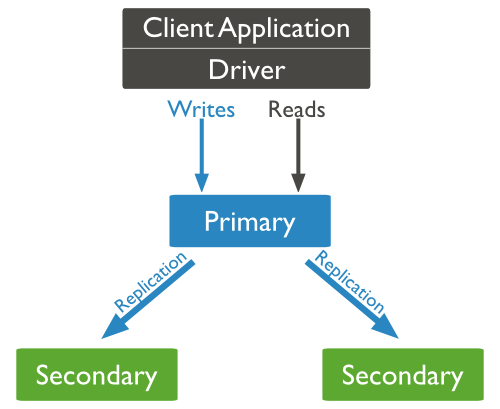

### Replica Set Features

- A cluster of N nodes
- Any one node can be primary
- All write operations go to primary
- Automatic failover
- Automatic recovery
- Consensus election of primary


### Set Up a Replica Set

- Shutdown already running MongoDB server.

- Start the MongoDB server by specifying -- replSet option
	- mongod --port "PORT" --dbpath "YOUR_DB_DATA_PATH" --replSet "REPLICA_SET_INSTANCE_NAME"
	- `mongod --port 27017 --dbpath "D:\set up\mongodb\data" --replSet rs0`

- It will start a mongod instance with the name rs0, on port 27017.

- Now start the command prompt and connect to this mongod instance.

- In Mongo client, issue the command `rs.initiate()` to initiate a new replica set.

- To check the replica set configuration, issue the command `rs.conf()`. 
- To check the status of replica set issue the command `rs.status()`.



### Add Members to Replica Set

- start mongod instances on multiple machines.

- `rs.add(HOST_NAME:PORT)`
- `rs.add("mongod1.net:27017")`

- You can add mongod instance to replica set only when you are connected to primary node.
- To check whether you are connected to primary or not
- `db.isMaster()`